### Video url = "https://youtu.be/0B5eIE_1vpU?t=2076"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('DrawnData1.csv')

In [16]:
X = df[['x','y']].values

In [62]:
y = df['z']=='a'

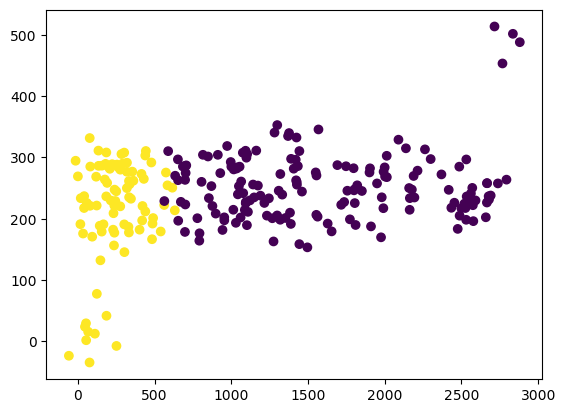

In [63]:
plt.scatter(X[:,0],X[:,1],c=y)

/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


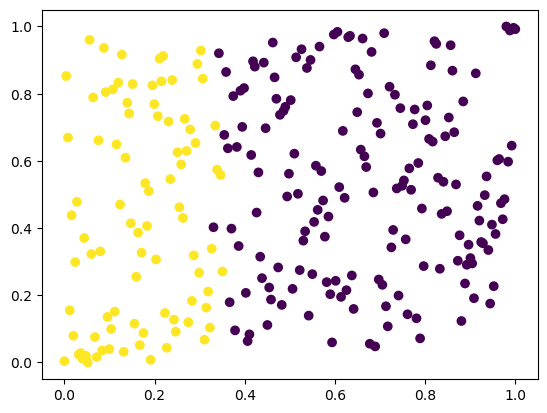

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,QuantileTransformer

Xc = QuantileTransformer().fit_transform(X) ### Also try and check - StandardScaler().fit_transform(X)
plt.scatter(Xc[:,0],Xc[:,1],c= y)

In [135]:
def plot_output(scaler) :
    pipe = Pipeline([
        ('scale',scaler),('model',KNeighborsClassifier())
    ])    
    pred = pipe.fit(X,y).predict(X)
    
    plt.figure(figsize=(9, 3))
    plt.subplot(1,3,1)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title("Original Data")
    plt.subplot(1,3,2)
    Xt = scaler.fit_transform(X)
    plt.scatter(Xt[:,0],Xt[:,1], c=y)
    plt.title("Transformed Data\n"+str(scaler))
    plt.subplot(1,3,3)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (3000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (3000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

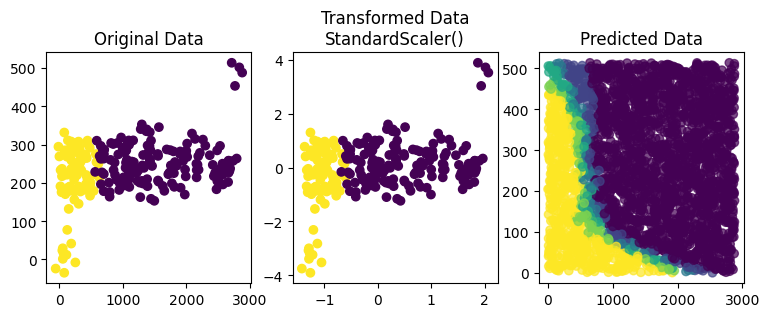

In [136]:
plot_output(StandardScaler())

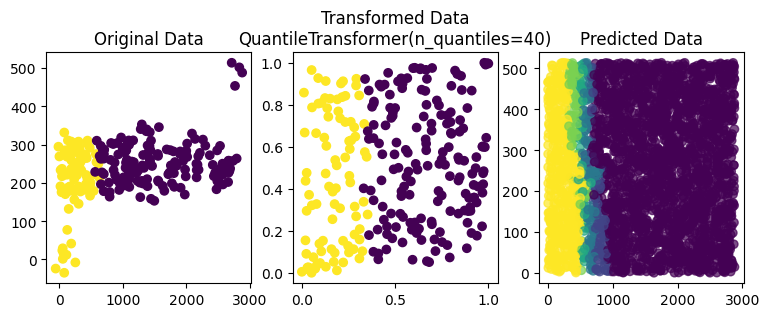

In [137]:
plot_output(QuantileTransformer(n_quantiles=40))

## New Dataset

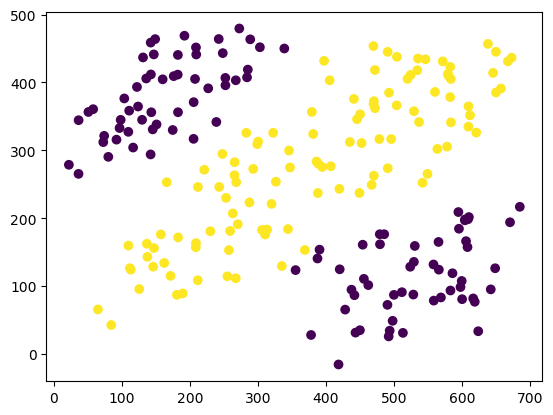

In [138]:
df = pd.read_csv("DrawnData2.csv")
X = df[['x','y']].values
y = df['z']=='a'

plt.scatter(X[:,0],X[:,1],c=y)

/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (217). n_quantiles is set to n_samples.
  warnings.warn(


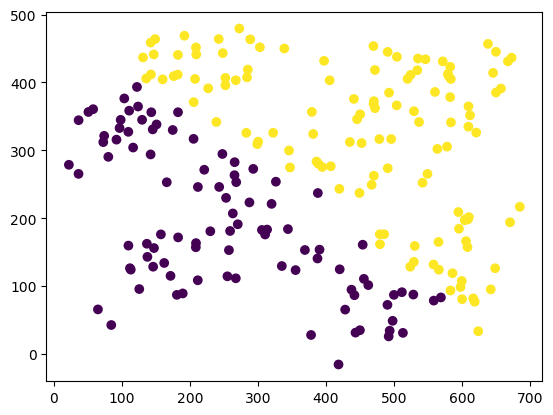

In [140]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('scale',QuantileTransformer()),('model',LogisticRegression())
])

pipe.fit(X,y)
pred = pipe.predict(X)
plt.scatter(X[:,0],X[:,1],c=pred)

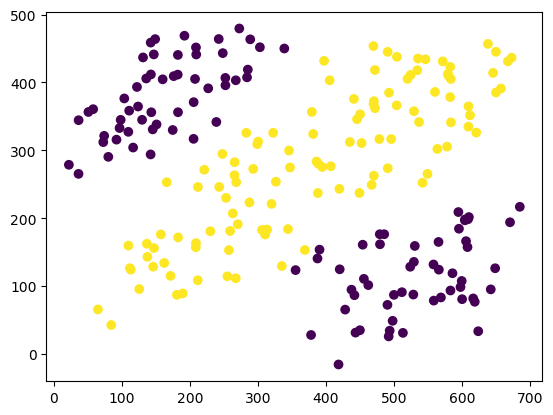

In [144]:
from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline([
    ('scale',PolynomialFeatures()),('model',LogisticRegression())
])

pipe.fit(X,y)
pred = pipe.predict(X)
plt.scatter(X[:,0],X[:,1],c=pred)

## OneHotEncoder 
### One-hot encoding can be used to transform one or more categorical features into numerical dummy features useful for training machine learning model.
#### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [148]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [149]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [151]:
enc.transform([["zero"]])

array([[0., 0., 0.]])